In [94]:
using Plots
using FileIO
using JLD2
using Base.Threads
#Pkg; Pkg.add("DistributedArrays")
println("nthreads = $(nthreads())")
using Printf
using LaTeXStrings

nthreads = 2


In [95]:
include("aux_functions.jl")

bump_x (generic function with 1 method)

We try two initial data sets:

1. l_pulse is a pulse to the left that starts on the left side and moves to the left, bounces at the origin and gets into the right side. 
2. r_pulse is a pulse to the left that starts on the right side and moves to the left, bounces at the origin and then gets back on the rigth side.




In [109]:
l_pulse = false
r_pulse = false
c_pulse = false
#l_pulse = true 
#r_pulse = true
c_pulse = true

if l_pulse
    file_name = "Results/l_pulse_401_401.jld2"
elseif r_pulse
    file_name = "Results/r_pulse_401_401.jld2"
elseif c_pulse
    #file_name = "Results/c_pulse_11_801.jld2"
    file_name = "Results/c_pulse_11_1601.jld2"
end

data = load(file_name);
run_name = data["run_name"]
@show (x0,x1,p_bump,A) = data["par_init"]
@show (Nl, L, dl, Nr, R, dr) = data["par_grid"]
@show (t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"]


r = [L + dr*(i-1) for i in 1:Nr]
l = [dl*(i-1) for i in 1:Nl]
t = [dt_d*(i-1) for i in 1:M_d]
u = [dt_d*(i-1) for i in 1:M_d];

(x0, x1, p_bump, A) = data["par_init"] = (0.2078125, 0.4078125, 4, 1.0)
(Nl, L, dl, Nr, R, dr) = data["par_grid"] = (11, 0.0125, 0.00125, 1601, 2.0, 0.00125)
(t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"] = (0.0, 2.0, 3201, 0.000625, 81, 0.025)


In [110]:
v = zeros(3Nl+3Nr,M_d)

for j in 1:M_d
    tiempo = @sprintf("%05d", j)
    v[:,j] = data["u/u_$tiempo"]
end

In [111]:
    ϕ_L = view(v,1:Nl,:)
    vp = view(v,Nl+1:2Nl,:)
    vm = view(v,2Nl+1:3Nl,:)
    ϕ_R = view(v,3Nl+1:3Nl+Nr,:)
    S = view(v,3Nl+Nr+1:3Nl+2Nr,:)
    W = view(v,3Nl+2Nr+1:3Nl+3Nr,:);

    typeof(ϕ_L)

    ϕ_L;

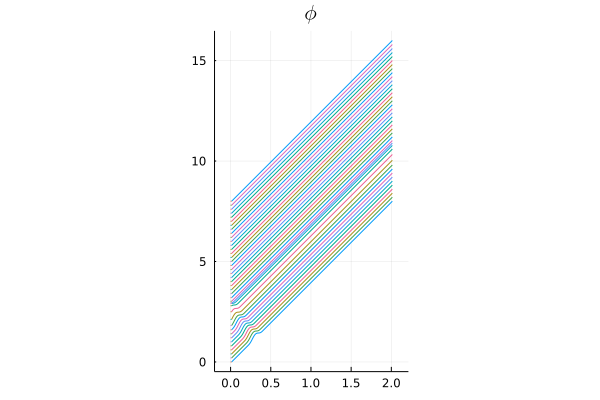

In [112]:
scale = 0.2
α = 0.1
β = α*(M_d-1)/(t_f-t_i)
#aspectratio = ((α*(M_d-1) + β*R)/(1+sqrt(2)))^(-1)
aspectratio = 1/β

p = plot(title=L"$\phi$", legend=false, aspectratio=aspectratio, xlim=(-0.2,R+L+0.2))
for n in 1:2:M_d  
    plot!(p,r,scale*ϕ_R[:,n].+α*(n-1) + β*(r .-L)  ,
    #color=:blue    , 
    label="n=$n")
    plot!(p,l,scale*ϕ_L[:,n].+α*(n-1), 
    #color=:blue ,
    label="n=$n")
end

p

if r_pulse
    #png("r_pulse_line")
end
if l_pulse
    #png("l_pulse_line")
end

p

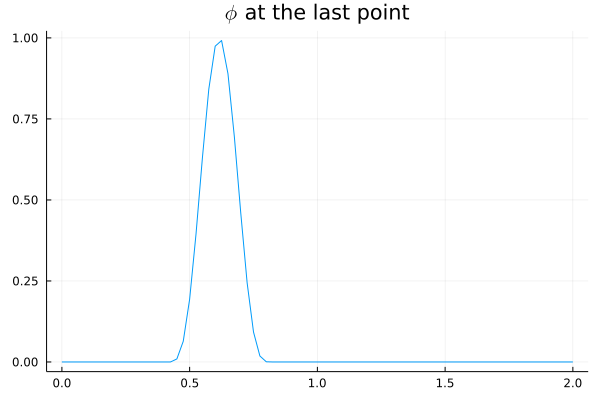

In [113]:
plot(t,ϕ_R[end,:],label="", title=L"\phi"*" at the last point")

In [101]:
if false
p = plot(title=L"S")
for n in 1:M_d  
    plot!(p,l,vp[:,n],label="")
    plot!(p,r,W[:,n], label="n=$n")
end

p
end

In [102]:

animation = false
pg = plot(ylim=(-0.02,1.02), legend=false)
if animation
    anim = @animate for n = 1:M_d
        plot(pg,l,ϕ_L[:,n]
        ,title = "ϕ at t = $(dt_d*n)"
        )
        plot(pg,r,ϕ_R[:,n])
    end

     
    gif(anim, "ϕ"  * run_name * ".gif", fps = 5)
end

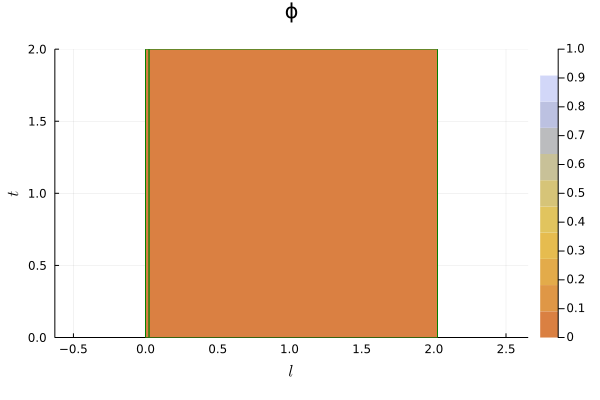

┌ Warning: GR: filled contour only supported with black contour lines
└ @ Plots /Users/reula/.julia/packages/Plots/hxZ0l/src/backends/gr.jl:2015
┌ Warning: GR: filled contour only supported with black contour lines
└ @ Plots /Users/reula/.julia/packages/Plots/hxZ0l/src/backends/gr.jl:2015
┌ Warning: GR: filled contour only supported with black contour lines
└ @ Plots /Users/reula/.julia/packages/Plots/hxZ0l/src/backends/gr.jl:2015
┌ Warning: GR: filled contour only supported with black contour lines
└ @ Plots /Users/reula/.julia/packages/Plots/hxZ0l/src/backends/gr.jl:2015
┌ Warning: GR: filled contour only supported with black contour lines
└ @ Plots /Users/reula/.julia/packages/Plots/hxZ0l/src/backends/gr.jl:2015
┌ Warning: GR: filled contour only supported with black contour lines
└ @ Plots /Users/reula/.julia/packages/Plots/hxZ0l/src/backends/gr.jl:2015


In [103]:



contour(l,t,ϕ_L'
        , aspectratio=1
        , fc =:beach
        , fill = true
        #, levels = [1.4,1.425,1.45,1.5,1.55,1.6,1.625,1.65,1.675,1.7,1.75,1.80,1.85,1.90,1.95,2,2.25,2.5,3,12,20,40]
        , levels = 10
        , c = cgrad(:ocean)
        , xlabel = L"l", ylabel = L"t"
        #, title = L"U(x,y)"
)
contour!(r,u,ϕ_R'
        , fc =:beach
        , fill = true
        , levels = 10
        , c = cgrad(:ocean)
        , xlabel = L"l", ylabel = L"t"
        , title = "ϕ"
)
#=
if r_pulse
        png("r_pulse")
end
if l_pulse
        png("l_pulse")
end
=#
#t
#ϕ_L

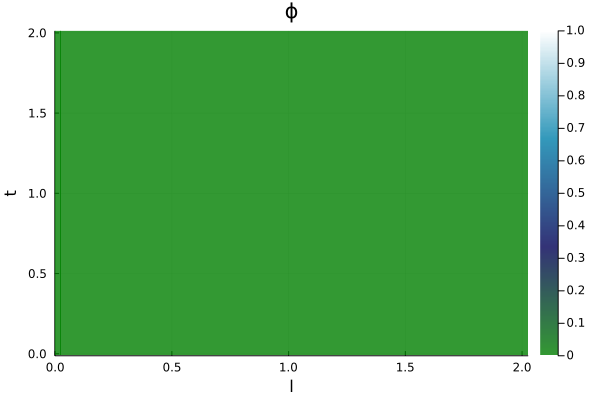

In [104]:
heatmap(l,t,ϕ_L'
        #c = cgrad([:blue,:white,:red]),
        ,fc = :ocean
        ,linealpha = 0.8, fillalpha=0.8
        #,yflip = true
        #,xflip = true
        ,xlabel = "l", ylabel = "t"
        ,title = "ϕ"
    )
heatmap!(r,t,ϕ_R'
        ,fc = :ocean
        ,linealpha = 0.8, fillalpha=0.8
        ,xlabel = "l", ylabel = "t"
        #,title = "Distribution function"
    )

In [106]:
#X=[(r[i],u[j]+r[i]) for i in 1:Nr, j in 1:M_d]

In [107]:
#heatmap(X,ϕ_R)
#surface(X,ϕ_R)